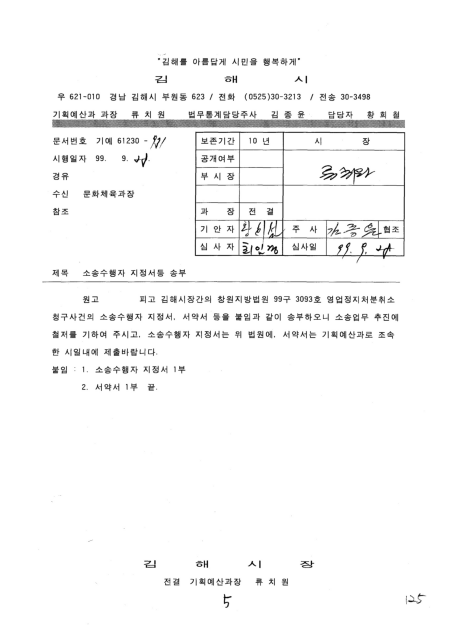

In [59]:
import cv2
import numpy as np
from PIL import Image

image_path = '5350002-1999-0001-0017.jpg'
image = cv2.imread(image_path)
import matplotlib.pyplot as plt

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()


In [60]:
with open('res_5350002-1999-0001-0017.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

gt_bboxes = []
for line in lines:
    coords = line.split(',')[:8]
    
    coords = [int(coord) for coord in coords]
    gt_bboxes.append(np.array([[coords[i], coords[i+1]] for i in range(0, len(coords), 2)]))
gt_bboxes[0]

array([[836, 269],
       [858, 269],
       [858, 291],
       [836, 291]])

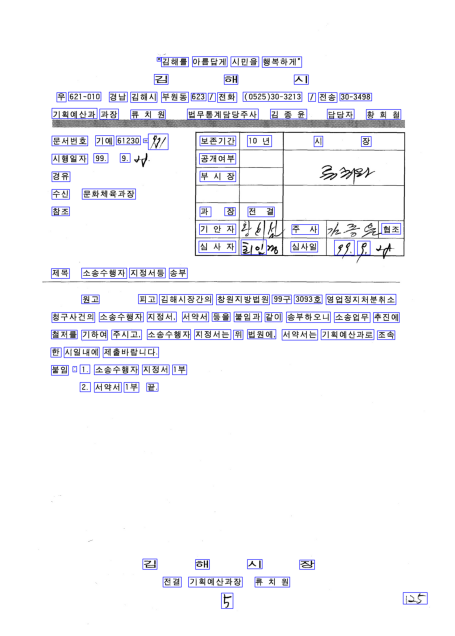

In [61]:
image_gt = image.copy()
image_gt = cv2.polylines(image_gt,[bbox for bbox in gt_bboxes], True, (0, 0, 255), 2)
plt.figure(figsize=(8, 8))
plt.imshow(image_gt)
plt.axis('off')
plt.show()

In [ ]:
with open('5350002-1999-0001-0017_infered.txt', 'r', encoding='utf-8') as f:
    dlines = f.readlines()

dt_bboxes = []
for line in dlines:
    coords = line.strip().split(',')
    coords = [int(coord) for coord in coords]
    grouped_coords = [[coords[i], coords[i+1]] for i in range(0, len(coords), 2)]
    dt_bboxes.append(grouped_coords)


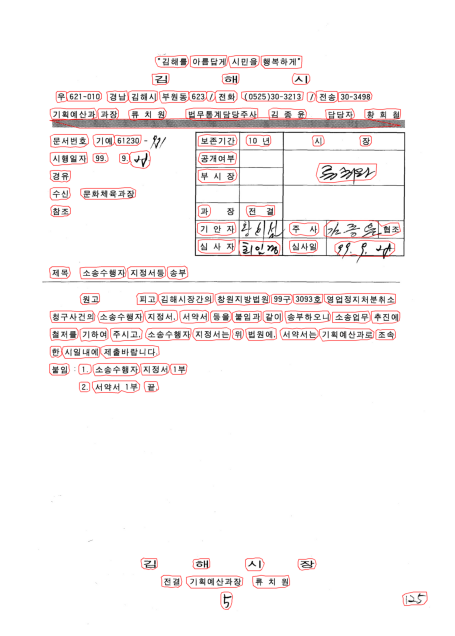

In [91]:
image_dt = image.copy()
contours = np.array(dt_bboxes, dtype=np.int32)
cv2.drawContours(image_dt, contours, -1, (255, 0, 0), 2)

plt.figure(figsize=(8, 8))
plt.imshow(image_dt)
plt.axis('off')
plt.show()

In [86]:
image_dt.shape

(3507, 2480, 3)